<a href="https://colab.research.google.com/github/louzeiro/extraCurricular/blob/main/limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Formação Cientista de Dados
<br>prof Fernando Amaral
</h1>
Disponível em: https://www.udemy.com/course/cientista-de-dados/


# Seção: Limpeza e tratamento dos dados

Notebook utilizado para o entendimento das técnicas e métodos comumente usados para a limpeza e tratamento de dados.

## Carregamento das bibliotecas e da base de dados



Inicialmente chamando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

Carregando e visualizando os dados no ambiente de desenvolvimento

In [ ]:
dados = pd.read_csv('Churn.csv', sep=";")
print('Esse dataset possue ', dados.shape[0], ' linhas e ', dados.shape[1],' colunas' )
print('Os 5 primeiros registros são:')
dados.head(5)

Esse dataset possue  999  linhas e  12  colunas
Os 5 primeiros registros são:


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Adicionando o nome nas colunas

In [ ]:
dados.columns = ['Id','Score','Estado', 'Genero','Idade','Patrimonio','Saldo','Produtos','TemCartCredito','Ativo','Salario','Saiu']
dados.head(5)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


## Análise exploratória dos dados

### Dados Categóricos

Visualizando o total de registros por estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

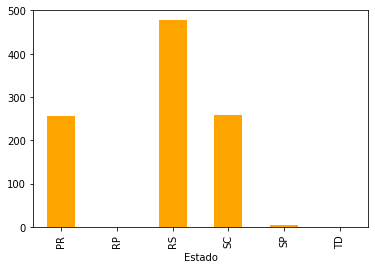

In [ ]:
estados = dados.groupby('Estado').size()
display(estados)
estados.plot.bar(color = 'orange')

Observa-se que há estados que não existem, como RP e TD, além disso a regra de negócio da empresa diz que são apenas os estados da região Sul, logo SP não deve fazer parte.

Totais por gênero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

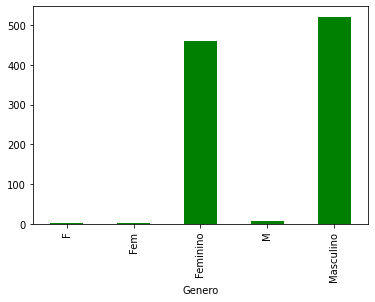

In [ ]:
genero = dados.groupby(['Genero']).size()
display(genero)
genero.plot.bar(color = 'green')

Observa-se que há padrões distintos na base de dados para referenciar os gêneros, ora é F ou Fem ou Feminino, ora é M ou Masculino.

### Dados Numéricos

#### Score

In [ ]:
print(dados['Score'].describe())

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


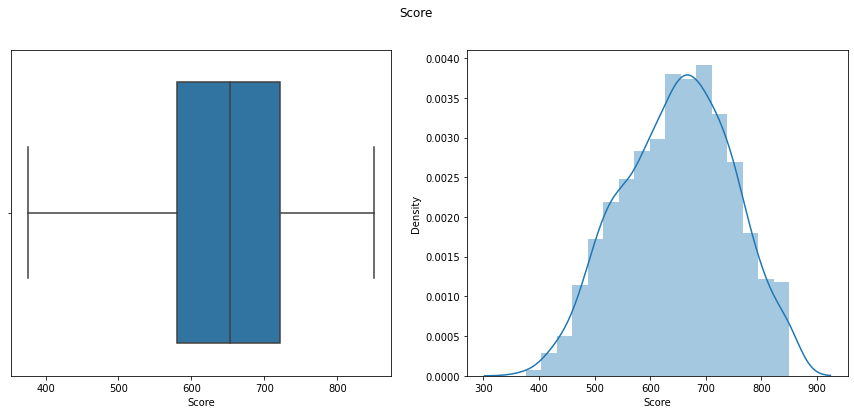

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Score')

srn.boxplot(ax=axes[0], data=dados, x='Score')
srn.distplot(dados['Score'])

#### Idade

In [ ]:
dados['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Observa-se que há registro com idade menor que 0 e registros com idade superior a 110, o que fere uma das regras de negócio. Contudo, a média e a mediana estão próximas, o que pode ser um bom indicativo da distribuição dos dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


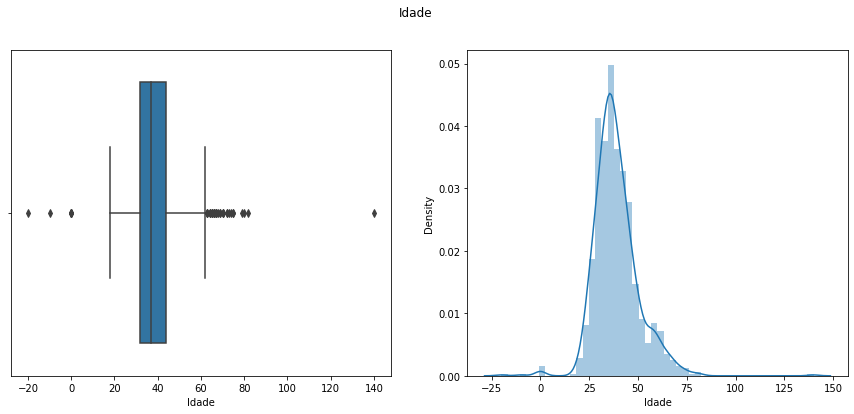

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Idade')

srn.boxplot(ax=axes[0], data=dados, x='Idade')
srn.distplot(dados['Idade'])

Conforme antecipado com o resumo dos dados, há alguns poucos dados fora das regras de negócio e também há outliers.

#### Saldo

In [ ]:
dados['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Do resumo podemos notar que o mínimo registrado nos dados é 0, e esse valor representa o primeiro quartil, o que pode indicar uma considerada concentração dos registros. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


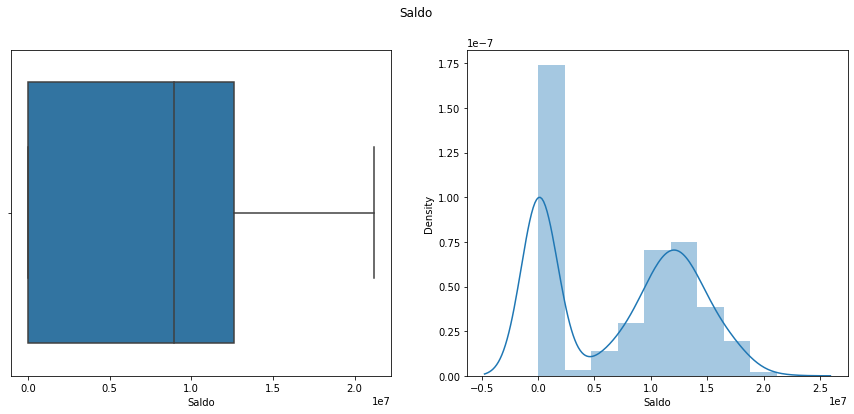

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Saldo')
srn.boxplot(ax=axes[0], data=dados, x='Saldo')
srn.distplot(dados['Saldo'])

Conforme já mencionado, o mínimo e o primeiro quartil coincidem e no gráfico de densidade, observa-se que há uma concentração de registros com saldo zerado, porém há uma região onde os dados apresentam um comportamento similar a distribuição normal.



#### Salário

In [ ]:
dados['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

No resumo pode-se observar que o atributo Salario apresenta um máximo bem significativo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


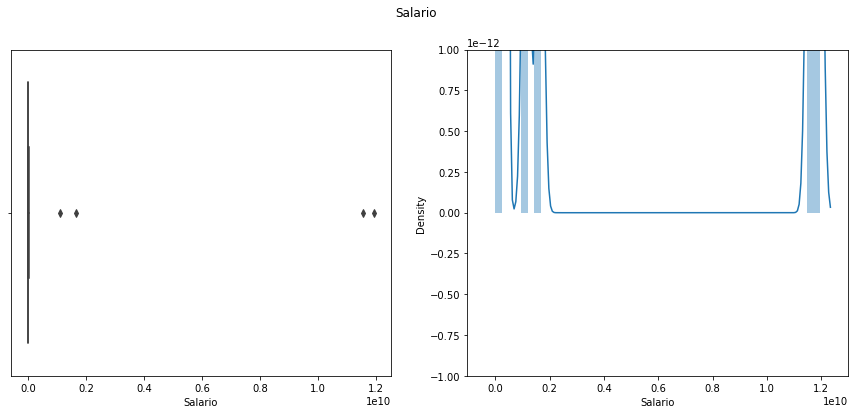

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Salario')
srn.boxplot(ax=axes[0], data=dados, x='Salario')
srn.distplot(dados['Salario'])

As visualizações apontam que há uma distorção dos dados, com alguns outlier.

### Dados faltantes (NAN)

In [ ]:
dados.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Com base no resultado, verifica-se que há dados faltantes nos atibutos: Genero e Salario.

## Tratamento dos dados

#### Dados faltantes (NAN)

 Para o Salário, esses valores serão substituídos pela mediana dos dados. Então inicialmente será calculada a mediana dos dados, com o auxílio da biblioteca *statists*. Em seguida, será substituído os NAN pela mediana

In [ ]:
mediana = sts.median(dados['Salario'])
dados['Salario'].fillna(mediana, inplace=True) #inplace para alterar o próprio conjunto de dados
print("Após a substituição, o total de NAN's no atributo Salaário:", dados['Salario'].isnull().sum())

Total de NAN no atributo Salaário: 0


Para os dados categóricos Gênero, há dois problemas para solucionar: o padrão e os NAN's

In [ ]:
dados.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
dados['Genero'].isnull().sum()

8

Para preencher os NAN's será utilizada a moda dos gêneros, que nesse caso é o Masculino

In [ ]:
dados['Genero'].fillna('Masculino',   #substitua os nan por masculino
                       inplace=True)  #substitua diretamente na base de dados

print('Total de NANs após o tratamento dos dados:', dados['Genero'].isnull().sum())

Total de NANs após o tratamento dos dados: 0


#### Padronização do gênero

Padronizando o atributo, primeiro vai localizar os regristos com gênero M, e então substituir na coluna 'Genero' por 'Masculino'. Em seguida, vai localizar os registros com 'Fem' ou 'F' e substituir na coluna 'Genero' por 'Feminino'.

In [ ]:
dados.loc[dados['Genero']=='M','Genero'] = 'Masculino'
dados.loc[dados['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'

dados.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    535
dtype: int64

#### Idade
Pela regra de negócio, tem-se que a idade válida é maior que 0 e menor que 120. Então inicialmente será visualizado os registros fora da regra de negócio.

In [ ]:
dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


Há 3 registros fora do domínio, nesse caso optou-se por substituir essas idades pela mediana dos dados, pois ela é menos sujeita a outlier que a média.

In [ ]:
mediana = sts.median(dados['Idade'])
dados.loc[(dados['Idade'] < 0)|(dados['Idade'] > 120), 'Idade'] = mediana

Conferindo se ocorreu a aalteração

In [ ]:
dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


#### Valores duplicados

Conforme definido na regra de negócio, cada cliente tem um Id único, então com base nesse atributo é possível verificar a existência de registros repetidos na base de dados.

In [ ]:
dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
dados.drop_duplicates(subset='Id',  # com base na coluna Id
                      keep='first', # deixe o primeiro registro
                      inplace=True) # faça essa substituição direto no dataset

dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


#### Estados 
Conforme dito anteriormente, a regra de negócio somente considera os estados da região Sul. Dessa forma, os regstros fora do domínio da regra será substituído pela moda, pois essa variável é categórica.

In [ ]:
dados.groupby(['Estado']).size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
dados.loc[dados['Estado'].isin(['RP','SP','TD']), 'Estado'] ='RS'
dados.groupby(['Estado']).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

#### Salários

Conforme visto, esse atributo apresentou alguns outliers, nesse caso para tratá-los serão utilizados os dados com até 2 desvio padrão, os registros fora desse intervalo receberam a mediana no lugar do antigo valor.

In [ ]:
dp = sts.stdev(dados['Salario'])
dp

528988918.4679201

verificando os registros acima do desvio padrão

In [ ]:
dados.loc[dados['Salario'] >= 2* dp]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


substituindo eles pela mediana dos salários

In [ ]:
mediana = sts.median(dados['Salario'])
dados.loc[dados['Salario'] >= 2*dp, 'Salario' ] = mediana

#visualizando
dados.loc[dados['Salario'] >= 2*dp]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dados.shape

(998, 12)